In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

%cd /content/gdrive/My Drive/DS203_Assignments/Assignment7

Mounted at /content/gdrive/
/content/gdrive/My Drive/DS203_Assignments/Assignment7


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# **Q1**

a.  Summarize the grades of all 50 courses that a student using 5 numbers assuming that the performance on some of the courses might be correlated:

Type of problem: Dimension reduction 

Input: grades of 50 courses

Output: 5 useful numbers

b. Divide students into unspecified personality groups based student based on their performance in various courses and extra-curricular activities.

Type of problem: Clustering

Input: Perfomance of students in courses and extra-currucular activities

Output: Personality groups

c. Predict the salary of a student after two years of graduating based on his/her performance in various courses, extra-curricular activities, and their first job type.

Type of problem: Regression

Input: Performance of student in courses, extra-curricular and first job type

Output: Salary 

d. . Predict the best type of job for a student based on his/her performance in various courses and extra-curricular activities

Type of problem: Classification

Input: Performance of student based on courses and extra-curricular activies

Output: Best job type for the student

# **Q2**

In [82]:
df=pd.DataFrame(columns=['Problem' ,'Framework', 'Target output variable type', 'Parameters', 'Hyperparameters and Ranges', 'Scikit-learn commands'])
df=df.append({'Problem':'Classification','Framework':'SVM-C with Gaussian kernel','Target output variable type':'one hot','Parameters':'Weights and bias','Hyperparameters and Ranges':' Slack penalty, kernel design','Scikit-learn commands':'svm.SVC(),svm.fit(),svm.predict()'},ignore_index=True)
df=df.append({'Problem':'Regression','Framework':'SVM-R with Gaussian kernel','Target output variable type':'floating point','Parameters':'Weights and bias','Hyperparameters and Ranges':' Slack penalty, kernel design','Scikit-learn commands':'svm.SVR(),svm.fit(),svm.predict()'},ignore_index=True)
df=df.append({'Problem':'Classification','Framework':'NN with one hidden layer','Target output variable type':'one hot','Parameters':'Weights and biases','Hyperparameters and Ranges':'penalty, no of layers, no of neurons per layer','Scikit-learn commands':'reg=MLPClassifier(),clt.fit(),clt.predict()'},ignore_index=True)
df=df.append({'Problem':'Regression','Framework':'NN with one hidden layer','Target output variable type':'floating point','Parameters':'Weights and biases','Hyperparameters and Ranges':'penalty, no of layers, no of neurons per layer','Scikit-learn commands':'reg=MLPRegressor(),reg.fit(),reg.predict()'},ignore_index=True)
df=df.append({'Problem':'Classification','Framework':'Random forest','Target output variable type':'one hot','Parameters':'Variables and thresholds at each node','Hyperparameters and Ranges':'Tree depth, minpurity, # trees, variables tested','Scikit-learn commands':'clf=RandomForestClassifier().fit(),clf.predict()'},ignore_index=True)
df=df.append({'Problem':'Regression','Framework':'Random forest','Target output variable type':'floating point','Parameters':'Variables and thresholds at each node','Hyperparameters and Ranges':'Tree depth, minpurity, # trees, variables tested','Scikit-learn commands':'ref=RandomForestRegressor().fit(),ref.predict()'},ignore_index=True)
df=df.append({'Problem':'Clustering','Framework':'k-means','Target output variable type':'List of variables and cluster they are present in','Parameters':'Centroids','Hyperparameters and Ranges':'No of clusters','Scikit-learn commands':'est=KMeans(),est.fit()'},ignore_index=True)
df=df.append({'Problem':'Clustering','Framework':'DBSCAN','Target output variable type':'List of variables and cluster they are present in','Parameters':'no of core, reachable and outliers','Hyperparameters and Ranges':'Min points, tolerance','Scikit-learn commands':'db=DBSCAN(), db.fit()'},ignore_index=True)
df=df.append({'Problem':'Dimension reduction','Framework':'PCA','Target output variable type':'Vector with reduced dimensions','Parameters':'None','Hyperparameters and Ranges':'dimension of input, no of components, no of rows','Scikit-learn commands':'pca=PCA(),pca.fit(),pca.transform()'},ignore_index=True)
df=df.append({'Problem':'Dimension reduction','Framework':'Kernel PCA','Target output variable type':'Vector with reduced dimensions','Parameters':'None','Hyperparameters and Ranges':'kernel, no of components','Scikit-learn commands':'kpca=KernelPCA(),kpca.fit_transform()'},ignore_index=True)
df

,Problem,Framework,Target output variable type,Parameters,Hyperparameters and Ranges,Scikit-learn commands
0,Classification,SVM-C with Gaussian kernel,one hot,Weights and bias,"Slack penalty, kernel design","svm.SVC(),svm.fit(),svm.predict()"
1,Regression,SVM-R with Gaussian kernel,floating point,Weights and bias,"Slack penalty, kernel design","svm.SVR(),svm.fit(),svm.predict()"
2,Classification,NN with one hidden layer,one hot,Weights and biases,"penalty, no of layers, no of neurons per layer","reg=MLPClassifier(),clt.fit(),clt.predict()"
3,Regression,NN with one hidden layer,floating point,Weights and biases,"penalty, no of layers, no of neurons per layer","reg=MLPRegressor(),reg.fit(),reg.predict()"
4,Classification,Random forest,one hot,Variables and thresholds at each node,"Tree depth, minpurity, # trees, variables tested","clf=RandomForestClassifier().fit(),clf.predict()"
5,Regression,Random forest,floating point,Variables and thresholds at each node,"Tree depth, minpurity, # trees, variables tested","ref=RandomForestRegressor().fit(),ref.predict()"
6,Clustering,k-means,List of variables and cluster they are present in,Centroids,No of clusters,"est=KMeans(),est.fit()"
7,Clustering,DBSCAN,List of variables and cluster they are present in,"no of core, reachable and outliers","Min points, tolerance","db=DBSCAN(), db.fit()"
8,Dimension reduction,PCA,Vector with reduced dimensions,None,"dimension of input, no of components, no of rows","pca=PCA(),pca.fit(),pca.transform()"
9,Dimension reduction,Kernel PCA,Vector with reduced dimensions,None,"kernel, no of components","kpca=KernelPCA(),kpca.fit_transform()"


Table with data for the various ML frameworks

# **Q3**

In [90]:
df=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


a. This is a supervised learning problem (regression) with target variable to be predicted is Rented bike count, which is of dicrete datatype and takes integer as value. 

b. Measures of performance that can be used here are R² score and MSE (Mean Squared Error) 

c. All variables except date are relevant to predict the target variable

In [91]:
df=df.drop(columns=['Date'])
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

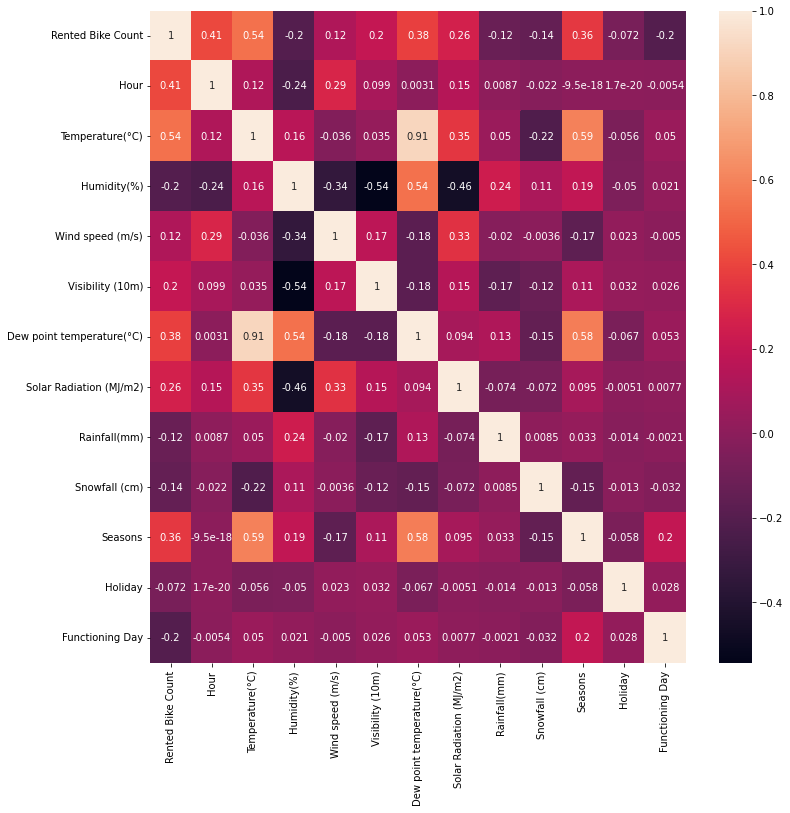

In [92]:
seasons = df['Seasons'][df['Seasons'].duplicated()==False]
df['Seasons'] = df['Seasons'].replace(list(seasons),range(len(seasons)))
holiday = df['Holiday'][df['Holiday'].duplicated()==False]
df['Holiday'] = df['Holiday'].replace(list(holiday),range(len(holiday)))
function = df['Functioning Day'][df['Functioning Day'].duplicated()==False]
df['Functioning Day'] = df['Functioning Day'].replace(list(function),range(len(function)))

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

d. Since Dew point temperature and temperature have a very high correlation, we will drop Dew point temperature since its just giving redundant information for the target variable. No feature has any missing values so all the other features are usable.

In [93]:
df=df.drop(columns=['Dew point temperature(°C)'])
for column in df.columns: #For normalisation
    if column != 'Rented Bike Count' and column != 'Seasons' and column != 'Holiday' and column != 'Functioning Day':  #Only need to normalize continuous variables
      df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())  
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0.000000,0.220280,0.377551,0.297297,1.000000,0.0,0.0,0.0,0,0,0
1,204,0.043478,0.215035,0.387755,0.108108,1.000000,0.0,0.0,0.0,0,0,0
2,173,0.086957,0.206294,0.397959,0.135135,1.000000,0.0,0.0,0.0,0,0,0
3,107,0.130435,0.202797,0.408163,0.121622,1.000000,0.0,0.0,0.0,0,0,0
4,78,0.173913,0.206294,0.367347,0.310811,1.000000,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,0.826087,0.384615,0.346939,0.351351,0.946275,0.0,0.0,0.0,3,0,0
8756,764,0.869565,0.370629,0.377551,0.310811,1.000000,0.0,0.0,0.0,3,0,0
8757,694,0.913043,0.356643,0.397959,0.040541,0.983781,0.0,0.0,0.0,3,0,0
8758,712,0.956522,0.347902,0.418367,0.135135,0.928535,0.0,0.0,0.0,3,0,0


e. Above is the data after assigning one-hot encoding to categorical data and normalizing the continuous variables.

f. We dont need PCA here as there are only 11 variables and doing PCA will result in worse results.

g. I will be using SVM-R ,random forest regressor and Lasso regression ML frameworks to train and test on this data.

In [94]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.3)
x_test,x_val,y_test,y_val=train_test_split(x_test, y_test, test_size=0.5, random_state=1)

h. Divided whole dataframe into train,test and validation data with a split of 70:15:15

i,j: Following are the results of different ML frameworks and their hyper parameters

In [95]:
grid_svm = GridSearchCV(svm.SVR(), param_grid = {'kernel':['rbf','poly','linear'],'C':[1,10,100,1000,10000,100000]})
grid_svm.fit(x_train,y_train)
print("R^2 score for best SVM-R fit to the data:",grid_svm.score(x_val,y_val))
print("Hyper parameters for the best fit:",grid_svm.best_params_)

R^2 score for best SVM-R fit to the data: 0.7783747392499001
Hyper parameters for the best fit: {'C': 100000, 'kernel': 'rbf'}


For SVM-R, our hyperparameters are the kernel used and the slack penalty C, we can observe the best score of 0.778 for the case C=100000 and kernel as rbf.

In [99]:
grid_rfr = GridSearchCV(RandomForestRegressor(), param_grid = {'n_estimators':[5,10,50,100,200,500,1000]})
grid_rfr.fit(x_train,y_train)
print("R^2 score for best Random forrest fit to the data:",grid_rfr.score(x_val,y_val))
print("Hyper parameters for the best fit:",grid_rfr.best_params_)

R^2 score for best Random forrest fit to the data: 0.8695359816837958
Hyper parameters for the best fit: {'n_estimators': 1000}


For Random forest, number of estimators is our hyperparameter, we can see that for number of estimators as 1000, we get best result of 0.869 R^2 score

In [100]:
grid_lasso = GridSearchCV(Lasso(), param_grid = {'alpha':[0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]})
grid_lasso.fit(x_train,y_train)
print("R^2 score for best Lasso regression fit to the data:",grid_lasso.score(x_val,y_val))
print("Hyper parameters for the best fit:",grid_lasso.best_params_)

R^2 score for best Lasso regression fit to the data: 0.5410396705801265
Hyper parameters for the best fit: {'alpha': 0.1}


For lasso regression, value of L2 penalty i.e alpha is our hyperparameter, we can see we get best result of 0.553 R^2 score for value of alpha as 0.1

In [101]:
results=pd.DataFrame(columns=['Model','Hyperparameters','RMSE','R^2 score'])
results=results.append({'Model':'SVM-R','Hyperparameters':grid_svm.best_params_,'RMSE':np.sqrt(mean_squared_error(y_val,grid_svm.predict(x_val))),'R^2 score':grid_svm.score(x_val,y_val)},ignore_index=True)
results=results.append({'Model':'Random Forest','Hyperparameters':grid_rfr.best_params_,'RMSE':np.sqrt(mean_squared_error(y_val,grid_rfr.predict(x_val))),'R^2 score':grid_rfr.score(x_val,y_val)},ignore_index=True)
results=results.append({'Model':'Lasso regression','Hyperparameters':grid_lasso.best_params_,'RMSE':np.sqrt(mean_squared_error(y_val,grid_lasso.predict(x_val))),'R^2 score':grid_lasso.score(x_val,y_val)},ignore_index=True)
results

,Model,Hyperparameters,RMSE,R^2 score
0,SVM-R,"{'C': 100000, 'kernel': 'rbf'}",309.816572,0.778375
1,Random Forest,{'n_estimators': 1000},237.706134,0.869536
2,Lasso regression,{'alpha': 0.1},445.843653,0.541040


k. We can see that Random Forest Regression gives the least RMSE and maximum R^2 score on the validation data and hence is the most model in this case.

In [102]:
print("Performance of Random Forest on test data:",grid_rfr.score(x_test,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test,grid_rfr.predict(x_test))))

Performance of Random Forest on test data: 0.8612404942082788
RMSE: 239.49527320295613


We can see that the model gives a pretty decent accuracy of 86.1 percent and hence is usable.

# **Q4**

In [132]:
df=pd.read_csv('crx.data')
df = df.set_axis(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9','X10','X11','X12','X13','X14','X15','Y'], axis=1, inplace=False)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


a. This is a supervised learning problem (classification) with target variable to be predicted is Y(Credit Approval), which is either + or - and can be one hot encoded

b. The measures of performance that can be used here are accuracy i.e number of correct predictions

c. All variables here are relevant to predict the target variable

In [133]:
df['X14']=pd.to_numeric(df['X14'],errors='coerce')
df['X2']=pd.to_numeric(df['X2'],errors='coerce')
print(df.isnull().sum())

X1      0
X2     12
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14    13
X15     0
Y       0
dtype: int64


We can observe a few empty values in X2 and X14 and we can initialise these to 0.

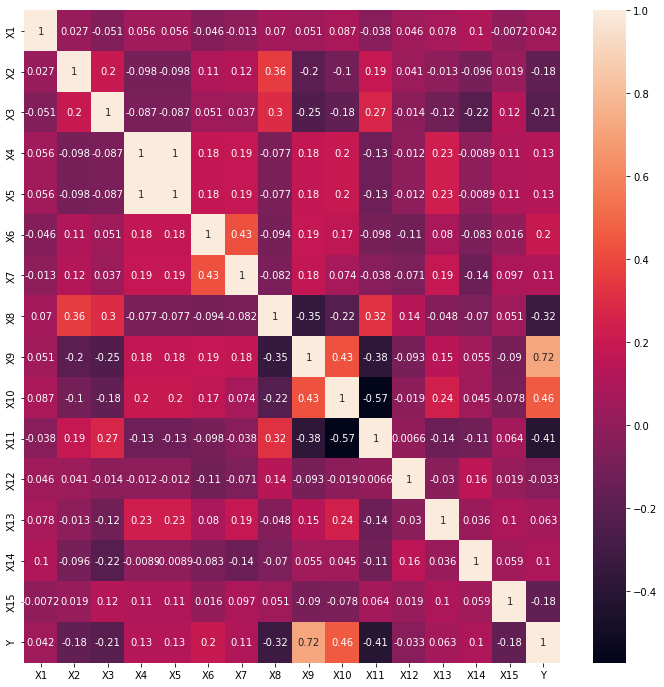

In [134]:
def one_hot_encode(name):
  col = df[name][df[name].duplicated()==False]
  df[name] = df[name].replace(list(col),range(len(col)))

for i in ['X1','X4','X5','X6','X7','X9','X10','X12','X13','Y']:
  one_hot_encode(i)

df['X2']=df['X2'].fillna(0)
df['X14']=df['X14'].fillna(0)

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

The correlation matrix for the various features and labels of the data. We can drop X1, X12 and X13 due to very low covariance with the target variable and hence they wont affect the value of the target variable that much.

In [192]:
df=df.drop(columns=['X1','X12','X13'])
df.insert(0,'Yi',df['Y'])
df=df.drop(columns=['Y'])

for column in df.columns: #For normalisation
    if column in ['X2','X3','X8','X14','X15']:  #Only need to normalize continuous variables
      df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) 

df

,Yi,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X14,X15
0,0,0.731090,0.159286,0,0,0,0,0.106667,0,0,6,0.0215,0.00560
1,0,0.305296,0.017857,0,0,0,0,0.052632,0,1,0,0.1400,0.00824
2,0,0.346791,0.055000,0,0,1,1,0.131579,0,0,5,0.0500,0.00003
3,0,0.251340,0.200893,0,0,1,1,0.060000,0,1,0,0.0600,0.00000
4,0,0.399751,0.142857,0,0,2,1,0.087719,0,1,0,0.1800,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,0.262679,0.360179,1,1,10,0,0.043860,1,1,0,0.1300,0.00000
685,1,0.282492,0.026786,0,0,6,1,0.070175,1,0,2,0.1000,0.00394
686,1,0.314642,0.482143,1,1,12,3,0.070175,1,0,1,0.1000,0.00001
687,1,0.223302,0.007321,0,0,11,1,0.001404,1,1,0,0.1400,0.00750


e.Final dataframe which can be used for training and testing after filling empty values, standardizing continuous variables and one bit encoding the categorical variables

f. We dont need PCA here since its only 12 features and PCA will result in worse results in such kind of data.

g. Here, I will be using SVM-C, Random forest classifier and neural network as the ML frameworks to perform classification on the data

In [193]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.3)
x_test,x_val,y_test,y_val=train_test_split(x_test, y_test, test_size=0.5, random_state=1)

h. Divided whole data into train data, test data and validation data with split for 70:15:15

i,j: Following are the results of different ML frameworks and their hyper parameters

In [203]:
grid_svm = GridSearchCV(svm.SVC(), param_grid = {'kernel':['rbf','poly'],'C':[1,10,100,1000,10000,100000,1000000]})
grid_svm.fit(x_train,y_train)
print("Accuracy for best SVM-C fit to the data:",grid_svm.score(x_val,y_val))
print("Hyper parameters for the best fit:",grid_svm.best_params_)

Accuracy for best SVM-C fit to the data: 0.8365384615384616
Hyper parameters for the best fit: {'C': 10, 'kernel': 'rbf'}


Hyper parameters for SVM-C are kernel used and slack penalty C, we can see that we get maximum accuracy of 83.65 percent for kernel=rbf and value of C as 10

In [202]:
grid_rfr = GridSearchCV(RandomForestClassifier(), param_grid = {'n_estimators':[1,10,50,100,200,500,1000]})
grid_rfr.fit(x_train,y_train)
print("Accuracy for best Random forrest fit to the data:",grid_rfr.score(x_val,y_val))
print("Hyper parameters for the best fit:",grid_rfr.best_params_)

Accuracy for best Random forrest fit to the data: 0.8557692307692307
Hyper parameters for the best fit: {'n_estimators': 200}


Hyper parameters for Random Forest Classifier are number of estimators and we get best accuracy of 85.57 percent for n_estimators as 200

In [201]:
grid_nn = GridSearchCV(MLPClassifier(), param_grid = {'hidden_layer_sizes':[(10),(20),(50),(100),(200),(500)],'activation':['identity', 'logistic', 'relu'],'solver':['lbfgs', 'sgd', 'adam']})
grid_nn.fit(x_train,y_train)
print("Accuracy for best neural network fit to the data:",grid_nn.score(x_val,y_val))
print("Hyper parameters for the best fit:",grid_nn.best_params_)

Accuracy for best neural network fit to the data: 0.8269230769230769
Hyper parameters for the best fit: {'activation': 'logistic', 'hidden_layer_sizes': 500, 'solver': 'adam'}


Hyper paramerers for neural network classifier with one hidden layer are size of hidden layer, activation function and solver to optimise. We get the best accuracy of 82.69 percent for logistic(sigmoid) activation, 500 as size of hidden layer and adam solver.

In [204]:
print("Comparing results of the different frameworks tried:")
results=pd.DataFrame(columns=['Model','Hyperparameters','Accuracy'])
results=results.append({'Model':'SVM-C','Hyperparameters':grid_svm.best_params_,'Accuracy':grid_svm.score(x_val,y_val)},ignore_index=True)
results=results.append({'Model':'Random Forest','Hyperparameters':grid_rfr.best_params_,'Accuracy':grid_rfr.score(x_val,y_val)},ignore_index=True)
results=results.append({'Model':'Neural network','Hyperparameters':grid_nn.best_params_,'Accuracy':grid_nn.score(x_val,y_val)},ignore_index=True)
results

Comparing results of the different frameworks tried:


,Model,Hyperparameters,Accuracy
0,SVM-C,"{'C': 10, 'kernel': 'rbf'}",0.836538
1,Random Forest,{'n_estimators': 200},0.855769
2,Neural network,"{'activation': 'logistic', 'hidden_layer_sizes...",0.826923


k. We can observe that Random forest gives the best result for the data with an accuracy of 85.57 percent, Hence we can now test this model on the test data.

In [208]:
print("Performance of Random forest classifier on test data:",grid_rfr.score(x_test,y_test))

Performance of Random forest classifier on test data: 0.8932038834951457


l. We can observe an accuracy of 89.32 percent on the test data set, which is a pretty good accuracy and hence, the Random forest model is usable

# **Q5**

In [66]:
df=[]
for i in ['0.csv','1.csv','2.csv','3.csv']:
  temp=pd.read_csv(i,header=None)
  df.append(temp)

df=pd.concat(df)
df=df.drop(columns=[64])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0
2918,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0
2919,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0
2920,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0


In [71]:
std_norm=np.std(np.linalg.norm(df,axis=0))
flag=True
losses=[]

for i in range(1,65):
  pca=PCA(n_components=i)
  reduced = pca.fit_transform(df)
  reconstructed = pca.inverse_transform(reduced)
  
  og=np.array(df)
  reconstruction_loss= np.sqrt(mean_squared_error(og,reconstructed))

  if reconstruction_loss<0.01*std_norm and flag:
    print("No of features:",i)
    flag=False
  
  losses.append(reconstruction_loss)

No of features: 25


Minimum number of features required such that the RMSE reconstruction error is less 1% of the standard deviation of the L2 norm of the 64 variable input is 25

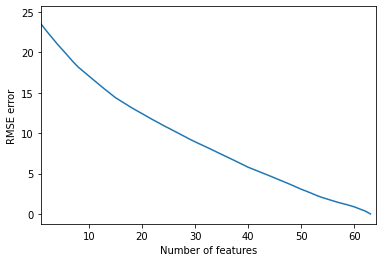

In [81]:
plt.plot(losses/abs(np.mean(og)))
plt.xlabel('Number of features')
plt.ylabel('Normalized RMSE error')
plt.xlim(1,64)
plt.show()

Plot of dimensions retained versus
normalized RMSE.